In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
#显示中文字符
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#查看阵列a1的属性
def check(a1):
    print(a1)  
    print("数据类型",type(a1))           #打印数组数据类型  
    print("数组元素数据类型：",a1.dtype) #打印数组元素数据类型  
    print("数组元素总数：",a1.size)      #打印数组尺寸，即数组元素总数  
    print("数组形状：",a1.shape)         #打印数组形状  
    print("数组的维度数目",a1.ndim)      #打印数组的维度数目
    print()

In [74]:
class Perceptron:
    def __init__(self,n=10):
        self.__epoch__=200 #回归轮数
        
        #param:
        # n 生成点的数量
        self.n=n
        self.dimension=2 #x的维度 (x1,x2···) 目前不能更改 因为generate_data中就写的2维
        self.theta=np.ones((self.dimension+1,1)) #shape(3,1)
        self.x,self.X,self.y=self.generate_data(self.n,True)
        
        
    def train(self):
        #训练采用两种方法相比较，一种是只用错误点进行训练，一种是用所有点进行训练
        
        #仅使用分类错误的点进行分类
        print('useWrongPoint')
        self.grad_ascent_useWrongPoint()
        self.plot_result()
        self.score()
        
        #使用所有的点进行分类
        self.theta=np.ones((self.dimension+1,1)) #shape(3,1)
    
        print('useAllpoint')
        self.grad_ascent_useAllPoint()
        self.plot_result()
        self.score()
    
    def grad_ascent_useWrongPoint(self):
        #一次选取错误点的个数
        __WrongPoint_Num__=5
        #function:
        # 梯度下降法计算参数
        # 仅使用分类错误的点进行分类

        X=self.X #shape(n,3)
        y=self.y #shape(n,1)
        theta=self.theta #shape(3,1)

        n = X.shape[0]
        alpha = 1
        

        for  i in tqdm(range(self.__epoch__)):
            
            temp=X@theta #shape(n,3)@(3,1) 
            temp1=temp*y #(n,1)*(n,1) temp1<0是分类错误的点
            
            wrong_idx=np.array(np.where(temp1<0)[0],dtype=np.int32)#选错误点 temp1维度是二维，np.where中返回两个数组,所以只取第一个数组序号
            np.random.shuffle(wrong_idx)#从错误点集中随机选取一部分
            
            delta_theta=X[wrong_idx[:__WrongPoint_Num__]].T@y[wrong_idx[:__WrongPoint_Num__]] #梯度的改变值
            loss0=self.loss_function(theta,X,y)
            theta=theta+alpha*delta_theta   #theta shape(3,1) 更新梯度
            loss1=self.loss_function(theta,X,y)
            if i%10==0:
                print(f'错误点个数:{wrong_idx.size}') #打印训练中剩余错误点的个数
                print(f'{i} Loss',loss0,loss1)
            #check(theta)
            if(loss1-loss0>0):
                alpha*=0.5

        self.theta=theta
        print('训练完成！参数为:')
        check(self.theta)
    
    def grad_ascent_useAllPoint(self):
        #function:
        # 梯度下降法计算参数
        # 使用所有的点计算参数
        
        X=self.X #shape(n,3)
        y=self.y #shape(n,1)
        theta=self.theta #shape(3,1)
        
        n = X.shape[0]
        alpha = 1

        for  i in tqdm(range(self.__epoch__)):
            delta_theta=-X.T@y  #(n,3) (n,1)直接将所有点的导数变化值相加
            
            loss0=self.loss_function(theta,X,y)
            theta=theta-alpha*delta_theta   #theta shape(3,1) 
            loss1=self.loss_function(theta,X,y)
            if i%10==0:
                temp=X@theta #shape(n,3)@(3,1) 
                temp1=temp*y #(n,1)*(n,1) temp1<0是分类错误的点
                temp1=np.squeeze(temp1)
                wrong_idx=np.array(np.where(temp1<0))
                print(f'错误点个数:{wrong_idx.size}') #打印训练中剩余错误点的个数
                print(f'{i} Loss',loss0,loss1)
            #check(theta)
            if(loss1-loss0>0):
                alpha*=0.5
        
        self.theta=theta
        print('训练完成！参数为:')
        check(self.theta)
        
    
    
    def generate_data(self,number,isNaive=True):
        #function:
        # 生成两组符合高斯分布的数据和不同标签
        #Param:
        # number:数据集中点的个数
        # naive:选择生成的数据是否满足朴素贝叶斯假设
        #Return:
        # train_x x坐标 [[-1,2],[2,0].···] 
        # x_matrix X矩阵 在train_x的基础上 在最后一列加一列1
        # train_y y标签 [1,0,1,1,1，···]

        number=int(number)
        # 类别为0的数据点数
        number0 = number//2
        means0 = [-0.6, 0.4]
        # 类别为1的数据点数
        number1 = number - number0
        means1 = [0.6, -0.4]
        # 随机变量方差与两个维度的协方差
        variance = 0.2#0.2
        cov = 0.5 #0.5
        train_x = np.zeros((number, 2))
        train_y = np.zeros((number, 1))

        # 满足朴素贝叶斯假设(两个维度的协方差矩阵除对角线外均为0)
        if isNaive:
            train_x[:number0, :] = np.random.multivariate_normal(means0, [[variance, 0], [0, variance]], number0)
            train_x[number0:, :] = np.random.multivariate_normal(means1, [[variance, 0], [0, variance]], number1)
            train_y[:number0] = 1
            train_y[number0:] = -1
        # 不满足朴素贝叶斯假设(两个维度的协方差矩阵除对角线外为cov)
        else:
            train_x[:number0, :] = np.random.multivariate_normal(means0, [[variance, cov], [cov, variance]], number0)
            train_x[number0:, :] = np.random.multivariate_normal(means1, [[variance, cov], [cov, variance]], number1)
            train_y[:number0] = 1
            train_y[number0:] = -1

        # 生成数据矩阵
        x_matrix = np.ones((number, 3))
        x_matrix[:,0:2]=train_x
        return train_x, x_matrix, train_y
    
    def loss_function(self,W,X,y):
        #function:
        # 计算损失函数
        #param: 
        # W:(w,b)参数
        # X: 数据集加一列1
        # y: 标签
        #return:
        # Loss: 损失函数 一个值
        
        #L(w,b)=-错误点加和{yi*(wxi+b)}
        #感知机的损失函数
        #1.错误点数 不连续不能优化
        #2.错误的点到决策面的距离加和(正确的点没有损失)
        
        #temp>0 点分类正确
        #temp<0 点分类错误
        temp=-X@W*y
        
        #要将分类错误的值加和
        #temp=np.where(temp>0,0,temp)
        ret=np.sum(temp)
        
        return ret
    
    def score(self):
        #function:
        # 在参数计算完成的情况下计算判别准确率
        X=self.X #(n,3)
        y=self.y #(n,1)
        theta=self.theta #(3,1)
        n=X.shape[0]
        
        classify_matrix=X@theta #使用z=X@theta z>0 代表判别标签为1 否则为-1
        classify_matrix=np.where(classify_matrix>0,1,-1)
        #check(classify_matrix)
        acc=np.mean(np.equal(classify_matrix,y))
        print("准确率acc:",acc)
    
    
    def plot_point(self):
        #function:
        # 将数据集中的两种标签的点画出来
        x=self.x
        X=self.X
        y=self.y
        theta=self.theta
        
        n=self.x.shape[0]
        
        plt.plot(x[0:n//2,0], x[0:n//2,1], color='g', linestyle='', marker='o',markersize=2, label=u"正例")
        plt.plot(x[n//2:n,0], x[n//2:n,1], color='r', linestyle='', marker='o',markersize=2, label=u"反例")
        plt.legend(loc='upper left')
        
        
    def plot_decision_surface(self):
        #function:
        # 将决策面按theta画出来 w1x1+w2x2+b=0
        x=self.x
        theta=self.theta
        
        x_slot=np.linspace(np.min(x[:,0]),np.max(x[:,0]))
        y_slot=(-theta[0,0]*x_slot-theta[2,0])/theta[1,0]
        #my_plot1 = np.polyval(-(theta/theta[2])[0:2][::-1],x_slot)
        plt.plot(x_slot, y_slot, linestyle='-', marker='', label="degree:1 " )
    
        
    def plot_result(self):
        #function:
        # 将分类结果画图显示出来
        plt.title("训练集 满足贝叶斯的分布 无正则项")
        self.plot_point()
        self.plot_decision_surface()
        fig=plt.figure()
        plt.show()
    
    

useWrongPoint


100%|██████████| 200/200 [00:00<00:00, 5900.12it/s]

错误点个数:51
0 Loss 15.007646560074726 -181.96126713467845
错误点个数:8
10 Loss -267.6148926353628 -266.9112912817808
错误点个数:8
20 Loss -266.2682262648012 -266.26758630209736
错误点个数:8
30 Loss -266.2668633102143 -266.266862729835
错误点个数:8
40 Loss -266.26686205507497 -266.2668620544444
错误点个数:8
50 Loss -266.26686205381895 -266.26686205381816
错误点个数:8
60 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
70 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
80 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
90 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
100 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
110 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
120 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
130 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
140 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
150 Loss -266.2668620538174 -266.2668620538174
错误点个数:8
160 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
170 Loss -266.2668620538175 -266.2668620538175
错误点个数:8
180 Loss

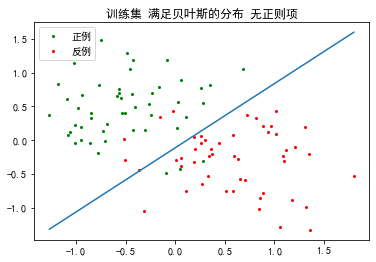

<Figure size 432x288 with 0 Axes>

准确率acc: 0.92
useAllpoint


100%|██████████| 200/200 [00:00<00:00, 28616.39it/s]

错误点个数:8
0 Loss 15.007646560074726 -4361.206733981651
错误点个数:8
10 Loss -43747.136158857174 -48123.350539398896
错误点个数:8
20 Loss -87509.2799642744 -91885.4943448161
错误点个数:8
30 Loss -131271.42376969167 -135647.6381502334
错误点个数:8
40 Loss -175033.567575109 -179409.7819556507
错误点个数:8
50 Loss -218795.71138052625 -223171.92576106798
错误点个数:8
60 Loss -262557.85518594354 -266934.0695664853
错误点个数:8
70 Loss -306319.99899136095 -310696.21337190265
错误点个数:8
80 Loss -350082.1427967783 -354458.35717732005
错误点个数:8
90 Loss -393844.2866021957 -398220.50098273734
错误点个数:8
100 Loss -437606.43040761305 -441982.6447881548
错误点个数:8
110 Loss -481368.57421303046 -485744.7885935721
错误点个数:8
120 Loss -525130.7180184476 -529506.9323989892
错误点个数:8
130 Loss -568892.8618238647 -573269.0762044066
错误点个数:8
140 Loss -612655.005629282 -617031.2200098238
错误点个数:8
150 Loss -656417.1494346992 -660793.3638152407
错误点个数:8
160 Loss -700179.293240116 -704555.5076206576
错误点个数:8
170 Loss -743941.4370455326 -748317.6514260743
错误点个数:8
180 Lo

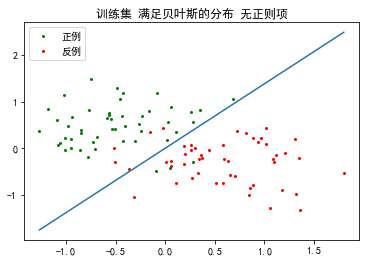

<Figure size 432x288 with 0 Axes>

准确率acc: 0.92


In [75]:
per=Perceptron(n=100)
per.train()
